In [19]:
# CelesteInvestigationP2

In [1]:
# If not installed, run this cell,
%pip install wbdata
%pip install pandas
%pip install iso3166
%pip install cufflinks
%pip install eep153_tools
%pip install plotly

  Using cached wbdata-1.0.0-py3-none-any.whl.metadata (2.6 kB)
  Using cached appdirs-1.4.4-py2.py3-none-any.whl.metadata (9.0 kB)
  Using cached backoff-2.2.1-py3-none-any.whl.metadata (14 kB)
  Using cached dateparser-1.2.0-py2.py3-none-any.whl.metadata (28 kB)
  Using cached shelved_cache-0.3.1-py3-none-any.whl.metadata (4.7 kB)
  Using cached tabulate-0.8.10-py3-none-any.whl.metadata (25 kB)
  Using cached tzlocal-5.2-py3-none-any.whl.metadata (7.8 kB)
Using cached wbdata-1.0.0-py3-none-any.whl (18 kB)
Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
Using cached backoff-2.2.1-py3-none-any.whl (15 kB)
Using cached dateparser-1.2.0-py2.py3-none-any.whl (294 kB)
Using cached shelved_cache-0.3.1-py3-none-any.whl (7.8 kB)
Using cached tabulate-0.8.10-py3-none-any.whl (29 kB)
Using cached tzlocal-5.2-py3-none-any.whl (17 kB)
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached iso3166-2

In [2]:
# import packages

import wbdata
import pandas as pd
import math
import iso3166
import plotly.offline as py
from scipy.optimize import newton
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import numpy as np
import cufflinks as cf
from matplotlib import animation as ani
cf.go_offline()

Key '-4598763455906660191' not in persistent cache.
Key '-7614836028359505665' not in persistent cache.
Key '-8125723229993632747' not in persistent cache.
Key '-916362459491978652' not in persistent cache.
Key '-9077749636131873824' not in persistent cache.
Key '5678703181623907966' not in persistent cache.
Key '-1764043924978838060' not in persistent cache.
Key '8521312972090818384' not in persistent cache.
Key '-2716070331117079137' not in persistent cache.
Key '3226846672850648678' not in persistent cache.
Key '-61589146525684609' not in persistent cache.
Key '-8936466868689047018' not in persistent cache.
Key '3457480368022199660' not in persistent cache.
Key '-2237993299821520005' not in persistent cache.
Key '-12543705702679196' not in persistent cache.
Key '2609798902535340252' not in persistent cache.
Key '-3539503479789651752' not in persistent cache.
Key '-274671377791093446' not in persistent cache.
Key '5545242677747340221' not in persistent cache.
Key '-186918727768987338

In [3]:
pd.options.plotting.backend = 'plotly'
SOURCE2=2 

In [5]:
# Look around a bit
wbdata.get_topics()

Key '-590700454584032948' not in persistent cache.


  id  value
----  -------------------------------
   1  Agriculture & Rural Development
   2  Aid Effectiveness
   3  Economy & Growth
   4  Education
   5  Energy & Mining
   6  Environment
   7  Financial Sector
   8  Health
   9  Infrastructure
  10  Social Protection & Labor
  11  Poverty
  12  Private Sector
  13  Public Sector
  14  Science & Technology
  15  Social Development
  16  Urban Development
  17  Gender
  18  Millenium development goals
  19  Climate Change
  20  External Debt
  21  Trade

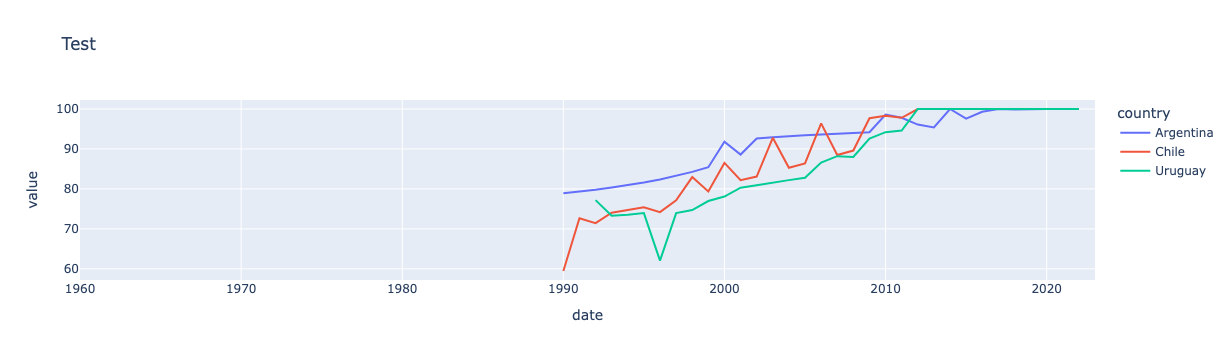

In [5]:
# this is extra code left over from playing around, for now
vars4 = {"EG.ELC.ACCS.RU.ZS":"Investigation"}

#BLA is all of Latin America and the Caribbean

scone=["BLA","CHL","ARG","URY"]
viet=["VNM","BRA"]

chldlabor = wbdata.get_dataframe(vars4,country=scone,parse_dates=True).squeeze().unstack('country')

chldlabor.plot(title="Test")

In [ ]:
wbdata.get_indicators(source=40)

In [ ]:
# World Population Pyramid

In [4]:
# Constructing a list of all possible age categories, such as 0-4, 5-9, ... 75-79, 80PLUS.
ages = []
for a in range(0,80,5):
    ages.append(f"{a:02d}"+f"{a+4:02d}")

ages.append("80UP")
# Print the result to ensure the correct ranges are created.
print(ages)

['0004', '0509', '1014', '1519', '2024', '2529', '3034', '3539', '4044', '4549', '5054', '5559', '6064', '6569', '7074', '7579', '80UP']


In [4]:
# Creates a dictionary, where each term defining a population in the wbdata dataset is named more descriptively.
male_ranges = {"SP.POP."+age_range+".MA":"Males "+age_range for age_range in ages}
female_ranges = {"SP.POP."+age_range+".FE":"Females "+age_range for age_range in ages}

# Develop a combined dictionary, then print it to sanity check.
categories = {**male_ranges, **female_ranges}
print(categories)

{'SP.POP.0004.MA': 'Males 0004', 'SP.POP.0509.MA': 'Males 0509', 'SP.POP.1014.MA': 'Males 1014', 'SP.POP.1519.MA': 'Males 1519', 'SP.POP.2024.MA': 'Males 2024', 'SP.POP.2529.MA': 'Males 2529', 'SP.POP.3034.MA': 'Males 3034', 'SP.POP.3539.MA': 'Males 3539', 'SP.POP.4044.MA': 'Males 4044', 'SP.POP.4549.MA': 'Males 4549', 'SP.POP.5054.MA': 'Males 5054', 'SP.POP.5559.MA': 'Males 5559', 'SP.POP.6064.MA': 'Males 6064', 'SP.POP.6569.MA': 'Males 6569', 'SP.POP.7074.MA': 'Males 7074', 'SP.POP.7579.MA': 'Males 7579', 'SP.POP.80UP.MA': 'Males 80UP', 'SP.POP.0004.FE': 'Females 0004', 'SP.POP.0509.FE': 'Females 0509', 'SP.POP.1014.FE': 'Females 1014', 'SP.POP.1519.FE': 'Females 1519', 'SP.POP.2024.FE': 'Females 2024', 'SP.POP.2529.FE': 'Females 2529', 'SP.POP.3034.FE': 'Females 3034', 'SP.POP.3539.FE': 'Females 3539', 'SP.POP.4044.FE': 'Females 4044', 'SP.POP.4549.FE': 'Females 4549', 'SP.POP.5054.FE': 'Females 5054', 'SP.POP.5559.FE': 'Females 5559', 'SP.POP.6064.FE': 'Females 6064', 'SP.POP.6569.

In [45]:
# Make a dataframe of the chosen 'country_choice' data

country_choice = "WLD"
world = wbdata.get_dataframe(categories,country=country_choice)

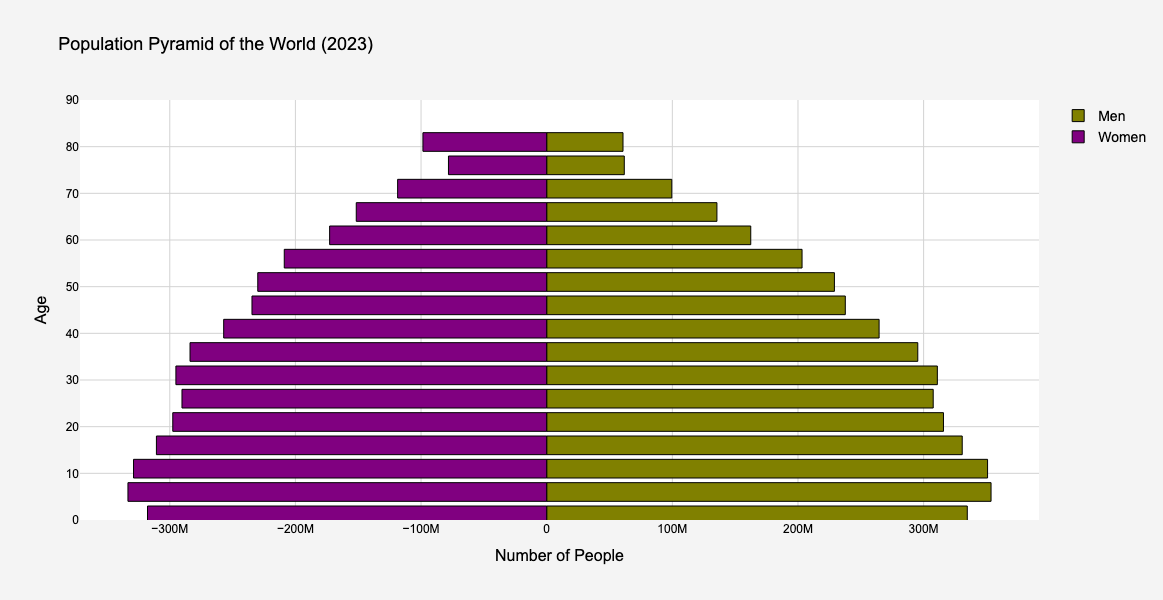

In [46]:
# Creating a population pyramid of the world
py.init_notebook_mode(connected=True)

layout_world1 = go.Layout(
    title="World Population Pyramid (2023)",
    title_font=dict(size=18, color='black'),
    barmode='overlay',
    width=600,
    height=600,
    paper_bgcolor='#f4f4f4',
    plot_bgcolor='#ffffff',
    font=dict(family="Arial, sans-serif", size=14, color="black"),
    xaxis=dict(
        title='Number of People',
        title_font=dict(size=16),
        tickfont=dict(size=12),
        gridcolor='lightgray'
    ),
    yaxis=dict(
        range=[0, 90],
        title='Age',
        title_font=dict(size=16),
        tickfont=dict(size=12),
        gridcolor='lightgray'
    ),
    showlegend=True
)

bins_world1 = [go.Bar(x = world.loc[str(2023),:].filter(regex="Male").values,
               y = [int(s[:2])+1 for s in ages],
               orientation='h',
               name='Men',
               marker=dict(color='olive', line=dict(color='black', width=1)),
               hoverinfo='skip'
               ),

        go.Bar(x = -world.loc[str(2023),:].filter(regex="Female").values,
               y=[int(s[:2])+1 for s in ages],
               orientation='h',
               name='Women',
               marker=dict(color='purple', line=dict(color='black', width=1)),
               hoverinfo='skip',
               )
        ]

py.iplot(dict(data=bins_world1, layout=layout_world1))

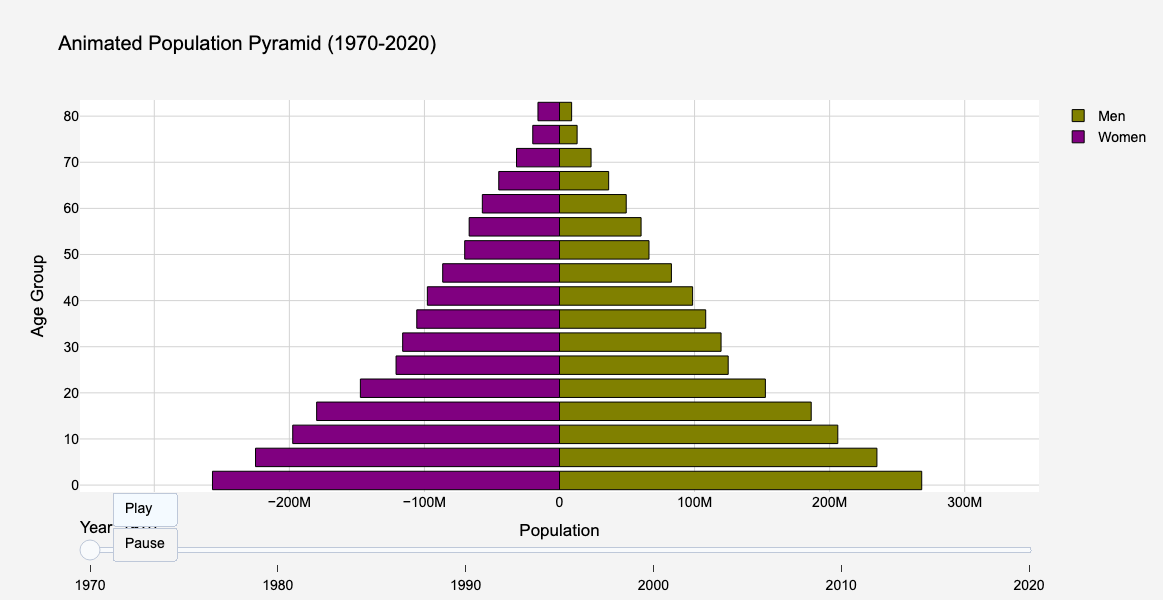

In [41]:
# An animated one

# Define available years
years = [1970, 1980, 1990, 2000, 2010, 2020]
ages = [f"{i}-{i+4}" for i in range(0, 85, 5)] + ["85+"]  # Includes 85+ group

# Function to create bar traces for a given year
def get_traces(year):
    male_values = world.loc[str(year)].filter(regex="Male").values
    female_values = world.loc[str(year)].filter(regex="Female").values

    return [
        go.Bar(
            x=male_values,
            y=[int(s.split('-')[0]) + 1 if '-' in s else int(s[:-1]) for s in ages],
            orientation='h',
            name='Men',
            marker=dict(color='olive', line=dict(color='black', width=1)),
            hoverinfo='skip'
        ),
        go.Bar(
            x=-female_values,  # Keep negative values for left alignment
            y=[int(s.split('-')[0]) + 1 if '-' in s else int(s[:-1]) for s in ages],
            orientation='h',
            name='Women',
            marker=dict(color='purple', line=dict(color='black', width=1)),
            hoverinfo='skip'
        )
    ]

# Ensure index is properly formatted for lookup
max_population = max(world.loc[world.index.astype(str).isin(map(str, years))].filter(regex="Male|Female").max().values)

# Create figure with initial data (1970)
fig2 = go.Figure(data=get_traces(1970), frames=[
    go.Frame(data=get_traces(year), name=str(year)) for year in years
])

# Update layout with proper axis alignment
fig2.update_layout(
    title="Animated World Population Pyramid (1970-2020)",
    width=700, height=600, paper_bgcolor='#f4f4f4', plot_bgcolor='#ffffff',
    font=dict(family="Arial, sans-serif", size=14, color="black"),
    xaxis=dict(title="Population", gridcolor='lightgray', range=[-max_population, max_population]),
    yaxis=dict(title="Age Group", gridcolor='lightgray'),
    barmode='overlay',
    showlegend=True,
    updatemenus=[{
        "buttons": [
            {"args": [None, {"frame": {"duration": 1000, "redraw": True}, "fromcurrent": True}],
             "label": "Play", "method": "animate"},
            {"args": [[None], {"frame": {"duration": 0, "redraw": True}, "mode": "immediate"}],
             "label": "Pause", "method": "animate"}
        ],
        "type": "buttons", "x": 0.1, "y": 0
    }],
    sliders=[{
        "steps": [{"args": [[str(year)], {"frame": {"duration": 0, "redraw": True}, "mode": "immediate"}],
                   "label": str(year), "method": "animate"} for year in years],
        "currentvalue": {"prefix": "Year: ", "font": {"size": 16}}
    }]
)

fig2.show()

In [37]:
# Now to make pop. pyramids for some of our target countries (the Operation Condor countries)
    # Brazil, Chile, Argentina, Uruguay,  Ecuador, Colombia, Peru, and Paraguay

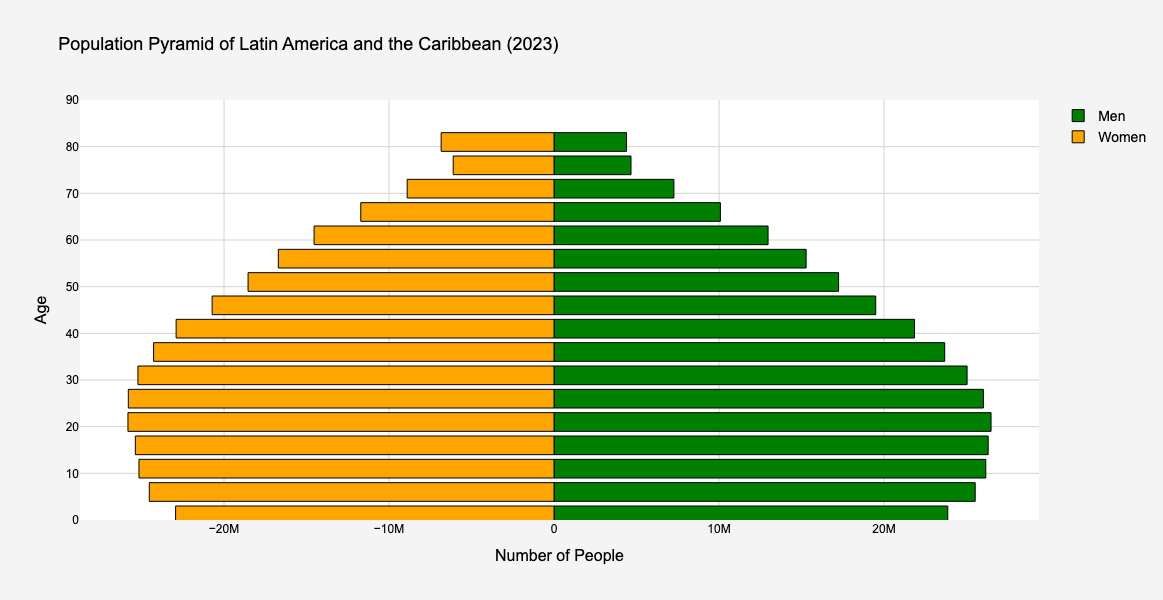

In [5]:
# Using Latin America & the Caribbean (TLA)
country_choice_2 = "TLA"
LA_caribbean = wbdata.get_dataframe(categories,country=country_choice_2)

# Creating a population pyramid
py.init_notebook_mode(connected=True)

layout_LA_caribbean = go.Layout(
    title="Population Pyramid of Latin America and the Caribbean (2023)",
    title_font=dict(size=18, color='black'),
    barmode='overlay',
    width=600,
    height=600,
    paper_bgcolor='#f4f4f4',
    plot_bgcolor='#ffffff',
    font=dict(family="Arial, sans-serif", size=14, color="black"),
    xaxis=dict(
        title='Number of People',
        title_font=dict(size=16),
        tickfont=dict(size=12),
        gridcolor='lightgray'
    ),
    yaxis=dict(
        range=[0, 90],
        title='Age',
        title_font=dict(size=16),
        tickfont=dict(size=12),
        gridcolor='lightgray'
    ),
    showlegend=True
)

bins_LA_caribbean = [go.Bar(x = LA_caribbean.loc[str(2023),:].filter(regex="Male").values,
               y = [int(s[:2])+1 for s in ages],
               orientation='h',
               name='Men',
               marker=dict(color='green', line=dict(color='black', width=1)),
               hoverinfo='skip'
               ),

        go.Bar(x = -LA_caribbean.loc[str(2023),:].filter(regex="Female").values,
               y=[int(s[:2])+1 for s in ages],
               orientation='h',
               name='Women',
               marker=dict(color='orange', line=dict(color='black', width=1)),
               hoverinfo='skip',
               )
        ]

py.iplot(dict(data=bins_LA_caribbean, layout=layout_LA_caribbean))

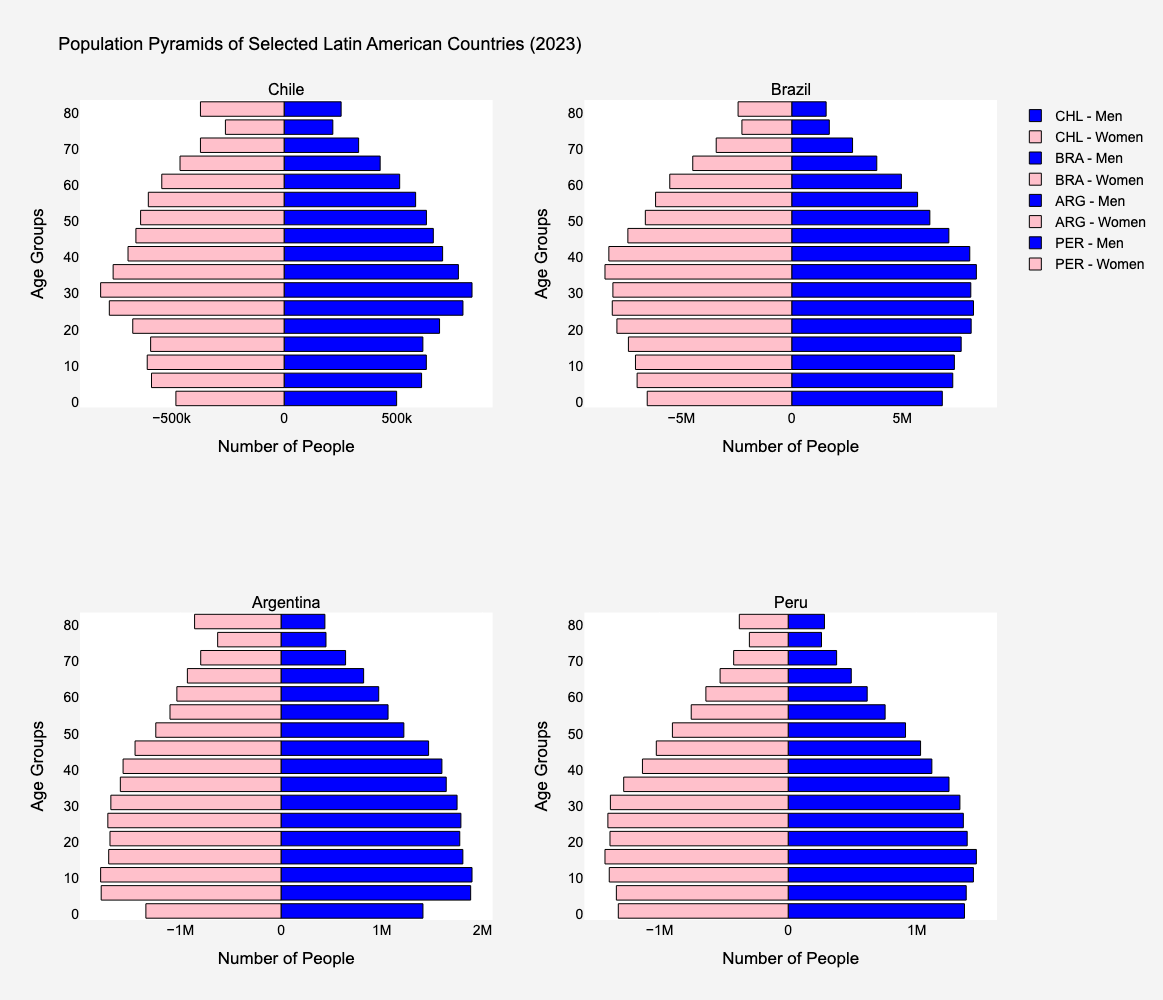

In [8]:
# A figure comparing the population pyramids of various Operation Condor countries in 2023 (recent data)

# Define multiple countries
country_choices = ["CHL", "BRA", "ARG", "PER"]
country_titles = ["Chile", "Brazil", "Argentina", "Peru"]

# Create a subplot layout (2 rows, 2 columns)
fig_4 = make_subplots(rows=2, cols=2, subplot_titles=country_titles)

# Loop through each country and generate its population pyramid
for i, (country, title) in enumerate(zip(country_choices, country_titles)):
    condor_countries = wbdata.get_dataframe(categories, country=country)

    # Extract male and female data
    male_data = condor_countries.loc[str(2023), :].filter(regex="Male").values
    female_data = -condor_countries.loc[str(2023), :].filter(regex="Female").values  # Negative for left alignment
    age_groups = [int(s[:2]) + 1 for s in ages]  # Convert age labels to integers

    # Determine subplot position
    row = i // 2 + 1
    col = i % 2 + 1

    # Add Male bar trace
    fig_4.add_trace(go.Bar(
        x=male_data,
        y=age_groups,
        orientation='h',
        name=f'{country} - Men',
        marker=dict(color='blue', line=dict(color='black', width=1)),
        hoverinfo='skip'
    ), row=row, col=col)

    # Add Female bar trace
    fig_4.add_trace(go.Bar(
        x=female_data,
        y=age_groups,
        orientation='h',
        name=f'{country} - Women',
        marker=dict(color='pink', line=dict(color='black', width=1)),
        hoverinfo='skip'
    ), row=row, col=col)

 # Customize X and Y axis labels for each subplot
    fig_4.update_xaxes(title_text="Number of People", row=row, col=col)
    fig_4.update_yaxes(title_text="Age", row=row, col=col)

# Updated layout for aesthetics!
fig_4.update_layout(
    title="Population Pyramids of Selected Latin American Countries (2023)",
    title_font=dict(size=18, color='black'),
    barmode='overlay',
    width=1200,  # Adjust width
    height=1000,  # Adjust height
    paper_bgcolor='#f4f4f4',
    plot_bgcolor='#ffffff',
    font=dict(family="Arial, sans-serif", size=14, color="black"),
    showlegend=True
)

# Make the final figure
fig_4.show()

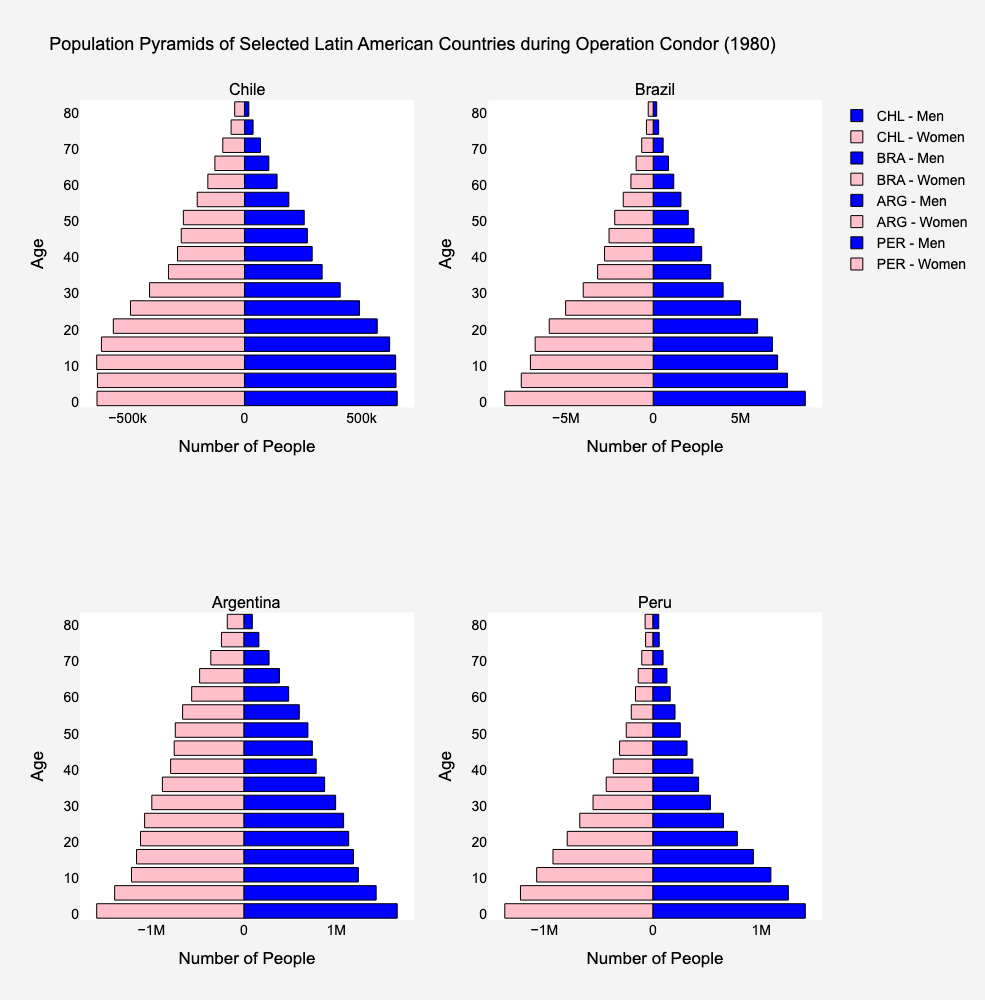

In [10]:
# A figure comparing the population pyramids of various Operation Condor countries in 1980

# Define multiple countries
country_choices = ["CHL", "BRA", "ARG", "PER"]
country_titles = ["Chile", "Brazil", "Argentina", "Peru"]

# Create a subplot layout (2 rows, 2 columns)
fig_5 = make_subplots(rows=2, cols=2, subplot_titles=country_titles)

# Loop through each country and generate its population pyramid
for i, (country, title) in enumerate(zip(country_choices, country_titles)):
    condor_countries = wbdata.get_dataframe(categories, country=country)

    # Extract male and female data
    male_data = condor_countries.loc[str(1980), :].filter(regex="Male").values
    female_data = -condor_countries.loc[str(1980), :].filter(regex="Female").values  # Negative for left alignment
    age_groups = [int(s[:2]) + 1 for s in ages]  # Convert age labels to integers

    # Determine subplot position
    row = i // 2 + 1
    col = i % 2 + 1

    # Add Male bar trace
    fig_5.add_trace(go.Bar(
        x=male_data,
        y=age_groups,
        orientation='h',
        name=f'{country} - Men',
        marker=dict(color='blue', line=dict(color='black', width=1)),
        hoverinfo='skip'
    ), row=row, col=col)

    # Add Female bar trace
    fig_5.add_trace(go.Bar(
        x=female_data,
        y=age_groups,
        orientation='h',
        name=f'{country} - Women',
        marker=dict(color='pink', line=dict(color='black', width=1)),
        hoverinfo='skip'
    ), row=row, col=col)

 # Customize X and Y axis labels for each subplot
    fig_5.update_xaxes(title_text="Number of People", row=row, col=col)
    fig_5.update_yaxes(title_text="Age", row=row, col=col)

# Updated layout for aesthetics!
fig_5.update_layout(
    title="Population Pyramids of Selected Latin American Countries during Operation Condor (1980)",
    title_font=dict(size=18, color='black'),
    barmode='overlay',
    width=1200,  # Adjust width
    height=1000,  # Adjust height
    paper_bgcolor='#f4f4f4',
    plot_bgcolor='#ffffff',
    font=dict(family="Arial, sans-serif", size=14, color="black"),
    showlegend=True
)

# Make the final figure
fig_5.show()

In [ ]:
# Look at the changes within a given country

In [12]:
# Argentina

argentina = wbdata.get_dataframe(categories,country='ARG')

a_bins = [go.Bar(x = argentina.loc[str(year),:].filter(regex="Male").values,
               y = [int(s[:2])+1 for s in age_ranges],
               orientation='h',
               name='Men',
               marker=dict(color='blue'),
               hoverinfo='skip'
               ),

        go.Bar(x = -argentina.loc[str(year),:].filter(regex="Female").values,
               y=[int(s[:2])+1 for s in age_ranges],
               orientation='h',
               name='Women',
               marker=dict(color='pink'),
               hoverinfo='skip',
               )
        ]

NameError: name 'year' is not defined